#### Outside Modeling Functions and Warning Suppression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#### Google collab setup

In [ ]:
from google.colab import drive, files

drive.mount("/content/gdrive", force_remount=True)
files.upload() #Upload the modeling_functions script to the virtual environment

#Import user defined modeling functions
from modeling_functions import grid_search_cv
from modeling_functions import evaluate_model

Mounted at /content/gdrive


Saving modeling_functions.py to modeling_functions.py


#### Training Data Imports

In [13]:
X_train = pd.read_csv('/content/gdrive/MyDrive/capstone/data/X_train.csv')
y_train = pd.read_csv('/content/gdrive/MyDrive/capstone/data/y_train.csv').values.ravel()

## Decision Tree

### Baseline Model: default parameters 

Average accuracy-- test: 0.9692815411133655, train: 1.0
Average f1-- test: 0.9692446201158693, train: 1.0
Average roc_auc-- test roc_auc: 0.9692839759744338, train: 1.0


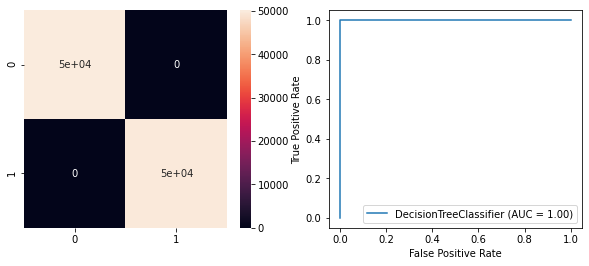

In [15]:
evaluate_model(DecisionTreeClassifier(random_state=666),X_train, y_train)

Decision tree could be overfit on the training data in general. I would like it to be more robust to handle special cases that could arise in the test data.

 Still has extremely high accuracy and f1 score for test.

### Grid Searches to reduce over fitting

target parameters:

*   ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning, default 0.0
*   max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion

#### Cost Complextity Pruning

Average accuracy-- test: 0.9704014799260037, train: 0.9999350032498375
Average f1-- test: 0.9703899539786628, train: 0.9999348504692023
Average roc_auc-- test roc_auc: 0.9663815414477022, train: 0.9999938348330879


{'ccp_alpha': 1e-05}

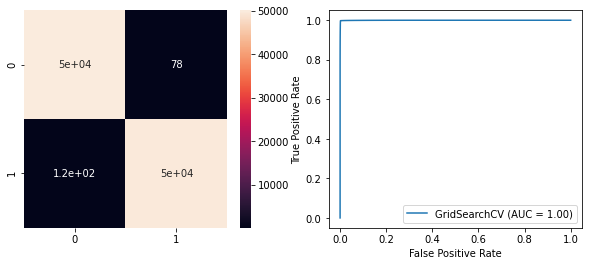

In [16]:
grid_search_params=  {
                      'ccp_alpha':[.001,.0001,.00001]
}
grid_search_cv(DecisionTreeClassifier(random_state=666), grid_search_params, X_train, y_train)

Modifying the CCP alpha reduced the magnitude of overfitting in the training datasets and actually increased the overall accuracy of the model

#### Maximum Number of Leaf Nodes

Average accuracy-- test: 0.9708614569271538, train: 0.9998075096245188
Average f1-- test: 0.9708426895416498, train: 0.9998070369196824
Average roc_auc-- test roc_auc: 0.9647728514887014, train: 0.9999542906982425


{'max_leaf_nodes': 2000}

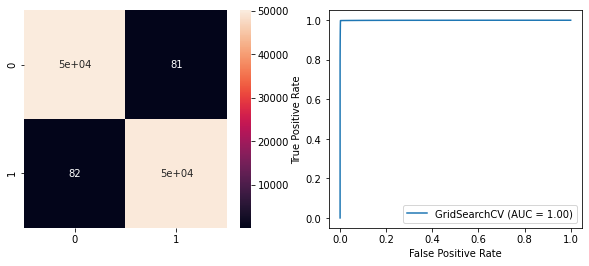

In [17]:
grid_search_params=  {
                      'max_leaf_nodes':[500,2000,3000]
}
grid_search_cv(DecisionTreeClassifier(random_state=666), grid_search_params, X_train, y_train)

Modifying the max number of leaf nodes slightly increased the accuracy of the test data while reducing the accuracy of training predictions

## Random Forest Classifier

Baseline Model


Average accuracy-- test: 0.9886705643685301, train: 1.0
Average f1-- test: 0.9886449801170767, train: 1.0
Average roc_auc-- test roc_auc: 0.9993826116944334, train: 1.0


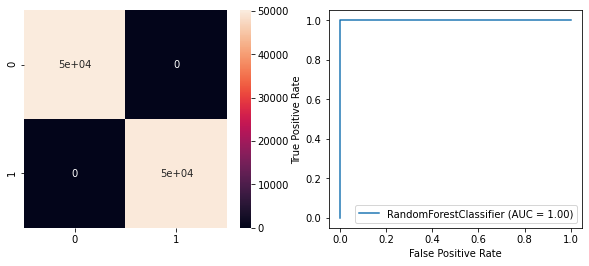

In [18]:
evaluate_model(RandomForestClassifier(), X_train, y_train)

Although the 'test' data has an extremely high accuracy, the model is heavily fit to the training data, which has perfect accuracy. I'll try to reduce the accuracy of the training data while the maintaining test scores

### Grid Searches to reduce over fitting

 I'll modify the same parameters as before:
 
*   ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning, default 0.0
*   max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion


#### Cost Complextity Pruning

Average accuracy-- test: 0.9890905454727263, train: 0.9999650017499124
Average f1-- test: 0.9890688548983642, train: 0.999964919251626
Average roc_auc-- test roc_auc: 0.9994095218600588, train: 0.9999999898759574


{'ccp_alpha': 1e-05}

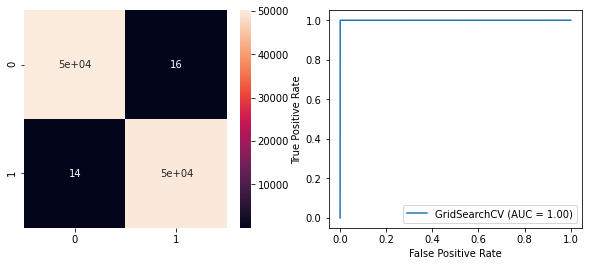

In [19]:
grid_search_params=  {
                      'ccp_alpha':[.001,.0001,.00001]
}
grid_search_cv(RandomForestClassifier(random_state=666), grid_search_params, X_train, y_train)

Modifying the CCP alpha slightly reduced the magnitude of overfitting in the training datasets and actually increased the overall accuracy of the model

#### Maximum Number of Leaf Nodes

Average accuracy-- test: 0.9892605369731513, train: 1.0
Average f1-- test: 0.9892400712946149, train: 1.0
Average roc_auc-- test roc_auc: 0.9994424777498254, train: 1.0


{'max_leaf_nodes': 3000}

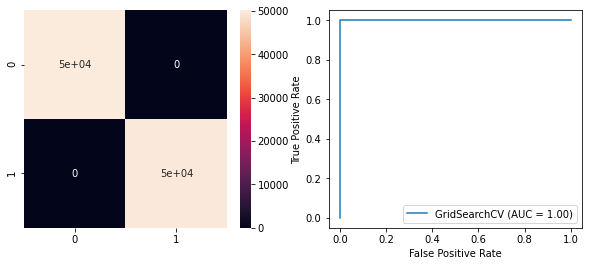

In [20]:
grid_search_params=  {
                      'max_leaf_nodes':[500,2000,3000]
}
grid_search_cv(RandomForestClassifier(random_state=666), grid_search_params, X_train, y_train)

The accuracy of the test score increased but the model is has a perfect fit on the training data

## Selected Models:


**DecisionTreeClassifier with a max_leaf_nodes of 2000**

This parameter outputted the highest accuracy while still slightly reducing overfitting


---


**RandomForestClassifier with a ccp_alpha of 1e-05**

This model had the second highest accuracy while not being perfecting fit on the training data. 